<a href="https://colab.research.google.com/github/LiubovRev/ML_hometasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd
df = pd.read_csv('medical-charges.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1. Візуально з допомогою графіків - побудувати діаграми. Наприклад, charges(smoker), charges(bmi), спробувати виявити залежності.
2. За допомогою кореляційної матриці дослідити, які числові змінні найбільше впливають на charges.
3. Оцінити вплив категоріальних змінних (sex, smoker, region) на charges. Погрупувати за категоріями та подивитись середнє charges: наприклад, df.groupby('region')['charges'].mean()


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [9]:
import plotly.express as px
fig = px.histogram(
    df,
    x="charges",
    color="sex",
    facet_col="region",
    marginal="box",
    nbins=50,
    title="Розподіл charges за статтю та регіоном"
)

fig.update_layout(bargap=0.1)
fig.show()

Спостереження:
1. Схожий загальний розподіл: у всіх чотирьох регіонах (southwest, southeast, northwest, northeast) основна маса пацієнтів має charges < 20k та у кожному регіоні є довгий хвіст справа (пацієнти з дуже високими медичними витратами, до 60k).
2. З бокс-плотів видно, що чоловіки мають вищі витрати в середньому, ніж жінки.
3. Суттєвих відмінностей між регіонами за розподілом медичних витрат немає. Усі графіки дуже схожі за формою. Це означає, що регіон має слабший вплив на медичні витрати.


**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [13]:
fig_region = px.histogram(
    df,
    x="region",
    color="smoker",
    barmode="group",
    title="Розподіл регіонів відносно того, чи є людина курцем (smoker)"
)

fig_region.show()

З графіків бачимо, що загалом маємо схожий розподів курців/некурців за регіонами. У регіоні southeast спостерігається дещо більша кількість курців по відношенню до інших регіонів.

In [14]:
fig_children = px.histogram(
    df,
    x="children",
    color="smoker",
    barmode="group",
    title="Розподіл кількості дітей відносно того, чи є людина курцем (smoker)"
)
fig_children.show()


З цього розподілу бачимо, курці мають менше дітей, ніж некурці.
Близько 75% пацієнтів не мають дітей.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [15]:
fig = px.violin(
    df,
    x="children",
    y="charges",
    box=True,
    points="all",
    title="Розподіл charges залежно від кількості дітей"
)

fig.show()

1. Медіанні витрати приблизно однакові при будь-якій кількості дітей, тобто кількість не має сильного прямого впливу на суму медичних витрат.
2. Викиди з високими charges трапляються у всіх категоріях, включаючи навіть тих, у кого немає дітей.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [21]:
import matplotlib.pyplot as plt

In [17]:
non_smoker_df = df[df.smoker == 'no']

In [18]:
def estimate_charges(age, w, b):
    return w * age + b

In [19]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

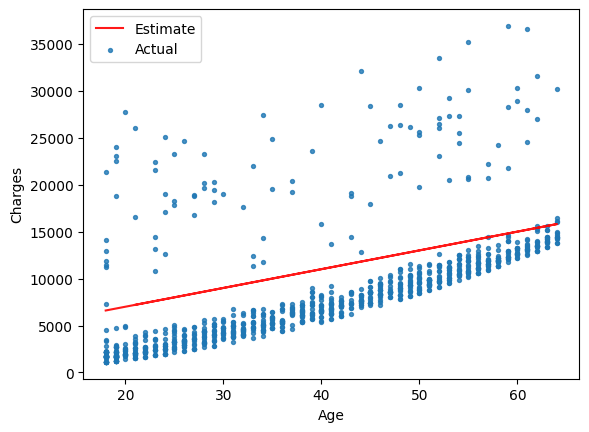

In [22]:
try_parameters(non_smoker_df, w=200, b=3000)

Лінія має замалий нахил, витрати з віком зростають швидше, ніж показує модель.

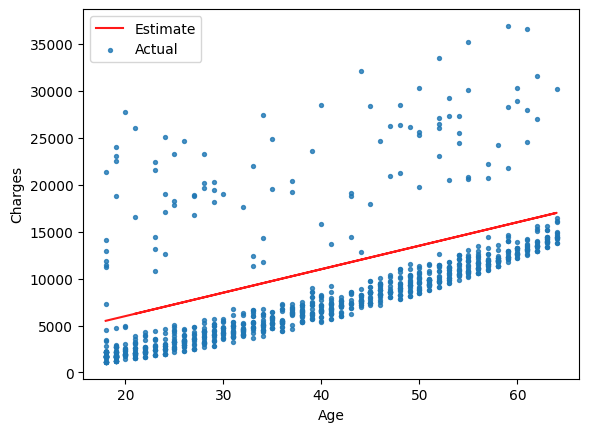

In [23]:
try_parameters(non_smoker_df, w=250, b=1000)

Нахил краще відповідає данним. Але зсув b занадто малий, спробуємо додати.

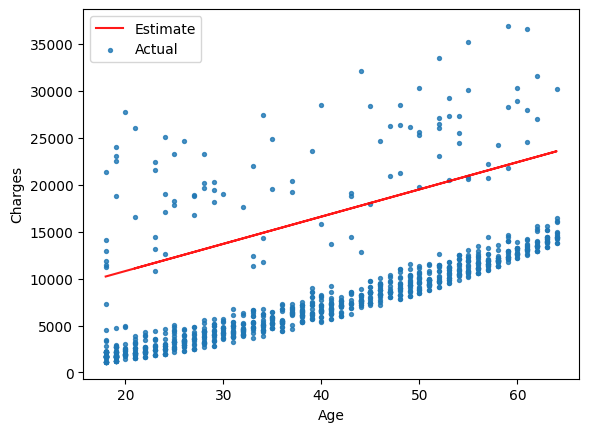

In [24]:
try_parameters(non_smoker_df, w=290, b=5000)

Лінія проходить приблизно по центру хмари точок.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [25]:
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [26]:
ages = non_smoker_df.age.values
actual_charges = non_smoker_df.charges.values

# Спроба 1
pred1 = estimate_charges(ages, w=200, b=3000)
rmse1 = rmse(actual_charges, pred1)

# Спроба 2
pred2 = estimate_charges(ages, w=350, b=1000)
rmse2 = rmse(actual_charges, pred2)

# Спроба 3
pred3 = estimate_charges(ages, w=290, b=5000)
rmse3 = rmse(actual_charges, pred3)

print(f"RMSE (w=200, b=3000): {rmse1:.2f}")
print(f"RMSE (w=350, b=1000): {rmse2:.2f}")
print(f"RMSE (w=290, b=5000): {rmse3:.2f}")

RMSE (w=200, b=3000): 5348.12
RMSE (w=350, b=1000): 7964.04
RMSE (w=290, b=5000): 9254.26


Перша спроба (w = 200, b = 3000) має найменше RMSE = 5348.12, тому вона дає найточніше наближення до реальних значень charges серед трьох варіантів.
Але варто враховувати, що:
- RMSE міряє середню помилку, але не якість форми
- RMSE не враховує перекіс у конкретних групах
- RMSE чутливий до викидів
Ймовірно, навіть найкраща така модель не дасть дуже низького RMSE, бо charges сильно залежать не тільки від віку, а й від куріння, BMI, кількості дітей тощо.

In [27]:
best_rmse = float('inf')
best_w = None
best_b = None

for w in range(100, 400, 10):         # змінюємо w з кроком 10
    for b in range(0, 10000, 500):    # змінюємо b з кроком 500
        pred = estimate_charges(ages, w, b)
        current_rmse = rmse(actual_charges, pred)

        if current_rmse < best_rmse:
            best_rmse = current_rmse
            best_w = w
            best_b = b

print(f"Найкраще знайдене RMSE: {best_rmse:.2f} при w={best_w}, b={best_b}")


Найкраще знайдене RMSE: 4715.34 при w=220, b=0


In [49]:
import numpy as np
import plotly.graph_objects as go

ages = non_smoker_df.age.values
charges = non_smoker_df.charges.values

w_values = list(range(150, 401, 35))
b_values = list(range(0, 7001, 1000))
combinations = [(w, b) for w in w_values for b in b_values]

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Початкова лінія
w0, b0 = combinations[0]
y_start = w0 * ages + b0
rmse0 = rmse(charges, y_start)

best_rmse = float('inf')
best_w, best_b = None, None

frames = []

for w, b in combinations:
    y_pred = w * ages + b
    current_rmse = rmse(charges, y_pred)
    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_w, best_b = w, b
    frames.append(go.Frame(
        data=[
            go.Scatter(x=ages, y=charges, mode='markers', marker=dict(size=5, opacity=0.5), name='Actual charges'),
            go.Scatter(x=ages, y=y_pred, mode='lines', line=dict(color='red'), name=f'Estimate (w={w}, b={b})')
        ],
        name=f"w={w}, b={b}",
        layout=go.Layout(title_text=f"Апроксимація: w={w}, b={b}, RMSE={current_rmse:.2f}")
    ))

# Кращий кадр останнім
best_y_pred = best_w * ages + best_b
best_frame = go.Frame(
    data=[
        go.Scatter(x=ages, y=charges, mode='markers', marker=dict(size=5, opacity=0.5), name='Actual charges'),
        go.Scatter(x=ages, y=best_y_pred, mode='lines', line=dict(color='green'), name=f'Best Estimate (w={best_w}, b={best_b})')
    ],
    name="best_frame",
    layout=go.Layout(title_text=f"Апроксимація з найкращим знайденим RMSE: w={best_w}, b={best_b}, RMSE={best_rmse:.2f}")
)
frames.append(best_frame)

# Фігура з початковим станом, найкраща лінія
fig = go.Figure(
    data=best_frame.data,
    frames=frames
)

fig.update_layout(
    title=f"Апроксимація з найкращим знайденим RMSE: w={best_w}, b={best_b}, RMSE={best_rmse:.2f}",
    xaxis_title="Age",
    yaxis_title="Charges",
    height=600,
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[
                        None,
                        {
                            "frame": {"duration": 300, "redraw": True},
                            "fromcurrent": True,
                            "mode": "immediate"
                        }
                    ]
                ),
                dict(
                    label='Pause',
                    method='animate',
                    args=[
                        [None],
                        {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}
                    ]
                )
            ],
            direction="left",
            pad={"r": 10, "t": 10},
            x=1.0,
            y=0.0,
            xanchor="right",
            yanchor="bottom"
        )
    ],
    sliders=[]
)


fig.show()
